# Import necessary libraries and the dataset from kaggle

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
import kagglehub

path = kagglehub.dataset_download("camnugent/california-housing-prices")
df = pd.read_csv(path + '/housing.csv') #downloaded from kaggle
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Data Analysis

In [3]:
df1 = df.drop(columns=['ocean_proximity'])

In [4]:
df1['bedrooms_per_room'] = df1['total_bedrooms'] / df1['total_rooms']
df1['population_per_household'] = df1['population'] / df1['households']
df1['rooms_per_household'] = df1['total_rooms'] / df1['households']
df1['income_per_household'] = df1['median_income'] / df1['households']

In [5]:
df1.corr()['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
income_per_household,0.057479
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650


<Axes: xlabel='longitude', ylabel='latitude'>

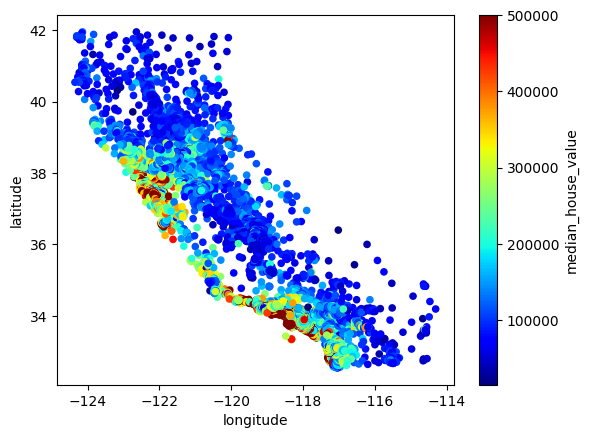

In [6]:
df1.plot(kind = 'scatter',x='longitude', y='latitude',c='median_house_value',colormap= 'jet', colorbar = True)

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
imp = SimpleImputer(strategy='median')
df['total_bedrooms'] = imp.fit_transform(df[['total_bedrooms']])
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df['rooms_per_household'] = df['total_rooms'] / df['households']

<Axes: xlabel='longitude', ylabel='latitude'>

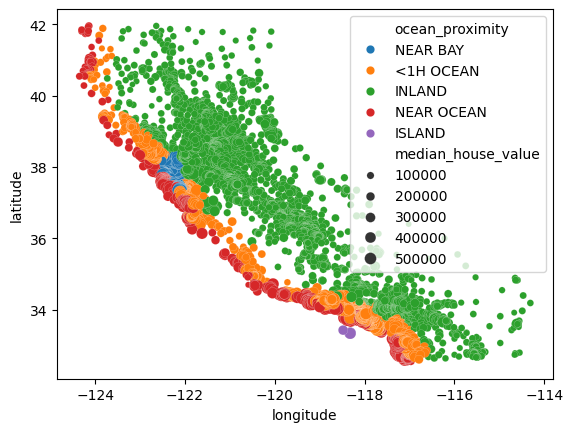

In [9]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='ocean_proximity',linewidth=0.1, size='median_house_value')

In [10]:
enc = OneHotEncoder()
df_ohe = pd.DataFrame(enc.fit_transform(df[['ocean_proximity']]).toarray())
df_ohe

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [11]:
scaled = StandardScaler()
df_scaled = pd.DataFrame(scaled.fit_transform(df.drop(columns=['ocean_proximity'])))
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,-1.029988,-0.049597,0.628559
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,-0.888897,-0.092512,0.327041
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,-1.291686,-0.025843,1.155620
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,-0.449613,-0.050329,0.156966
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.639087,-0.085616,0.344711
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,0.165994,-0.049110,-0.155023
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.021671,0.005021,0.276881
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,0.021134,-0.071735,-0.090318
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,0.093467,-0.091225,-0.040211


In [12]:
# df = prep.fit_transform(df)
df_final = pd.concat([df_scaled,df_ohe],axis=1)
df_final

,0,1,2,3,4,5,6,7,8,9,10,11,0,1,2,3,4
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,-1.029988,-0.049597,0.628559,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,-0.888897,-0.092512,0.327041,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,-1.291686,-0.025843,1.155620,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,-0.449613,-0.050329,0.156966,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,-0.639087,-0.085616,0.344711,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,0.165994,-0.049110,-0.155023,0.0,1.0,0.0,0.0,0.0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.021671,0.005021,0.276881,0.0,1.0,0.0,0.0,0.0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,0.021134,-0.071735,-0.090318,0.0,1.0,0.0,0.0,0.0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,0.093467,-0.091225,-0.040211,0.0,1.0,0.0,0.0,0.0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns=[8]), df_final[8], test_size=0.2, random_state=42) #column [8] refers to median_house_value

In [14]:
class LR_python():
    def __init__(self, lr, iter):
      self.lr = lr
      self.iter = iter

    def fit(self, X, y):
      self.m, self.n = X.shape
      self.Θ = [0]*((self.n))

      #iterations begin
      for i in range(self.iter):

        #hypothesis function
        y_pred = []
        for j in range(self.m):
          hypothesis = 0
          for k in range(self.n):
            hypothesis += self.Θ[k]*X.iloc[j,k]
          y_pred.append(hypothesis)


        #mean square error cost function
        cost_func = 0
        for j in range(self.m):
          cost_func += ((y_pred[j]-y.iloc[j])**2)
        cost_func = (1/(2*self.m))*cost_func
        print(f"Cost function after {i}th iteration = {cost_func}") if i%100==0 or i==(self.iter-1) else None

        #gradient descent optimization
        for k in range(self.n):
          gΘ = 0
          for j in range(self.m):
            gΘ += (y_pred[j]-y.iloc[j])*X.iloc[j,k]
          gΘ = (1/self.m)*gΘ

          self.Θ[k] = self.Θ[k] - self.lr*gΘ

    def predict(self, X):

      y_pred = []
      for j in range(X.shape[0]):
        hypothesis = 0
        for k in range(self.n):
          hypothesis += self.Θ[k]*X.iloc[j,k]
        y_pred.append(hypothesis)
      return y_pred

    def metrics(self, y, y_pred):
      print(f"Mean Absolute Error (MAE): {(abs(y-y_pred)).mean()}")
      print(f"Root Mean Square Error (RMSE): {math.sqrt(((y-y_pred).dot(y-y_pred))/self.m)}")
      print(f"R-squared (R2 score): {1 - ((y-y_pred).dot(y-y_pred))/((y-y.mean()).dot(y-y.mean()))}")

    def theta(self):
      return self.Θ


In [ ]:
lr = LR_python(lr=0.01,iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr.metrics(y_test, y_pred)

Cost function after 0th iteration = 0.501967404257205


In [ ]:
class LR_numpy():
    def __init__(self, lr, iter):
      self.lr = lr
      self.iter = iter

    def fit(self, X, y):
      self.m, self.n = X.shape
      self.Θ = [0]*((self.n))

      #iterations begin
      for i in range(self.iter):

        #hypothesis function
        y_pred = np.dot(X,self.Θ)


        #mean square error cost function
        cost_func = (1/(2*self.m))*np.sum(np.square(y_pred-y))
        print(f"Cost function after {i}th iteration = {cost_func}") if i%100==0 or i==(self.iter-1) else None

        #gradient descent optimization
        gΘ = - (2/self.m) *np.dot( X.T,(y-y_pred))
        self.Θ = self.Θ - self.lr*gΘ


    def predict(self, X):

      return np.dot(X,self.Θ)


    def metrics(self, y, y_pred):
      print(f"Mean Absolute Error (MAE): {np.mean(np.abs(y-y_pred))}")
      print(f"Root Mean Square Error (RMSE): {np.sqrt(np.mean(np.square(y-y_pred)))}")
      print(f"R-squared (R2 score): {1 - np.sum((np.square(y-y_pred)))/np.sum((np.square(y-np.mean(y))))}")

    def theta(self):
      return self.Θ


In [ ]:
lr2 = LR_numpy(lr=0.01,iter=1000)
lr2.fit(X_train, y_train)
y_pred = lr2.predict(X_test)
lr2.metrics(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
y_pred = lr3.predict(X_test)
print(f"Mean Absolute Error (MAE): {np.mean(np.abs(y_test-y_pred))}")
print(f"Root Mean Square Error (RMSE): {np.sqrt(np.mean(np.square(y_test-y_pred)))}")
print(f"R-squared (R2 score): {1 - np.sum((np.square(y_test-y_pred)))/np.sum((np.square(y_test-np.mean(y_test))))}")